# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [3]:
import zipfile
import pandas as pd
zip_path = r'C:\Users\srila\Downloads\downloaded-file.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  
    
csv_path = 'extracted_data/Cancer_Data.csv'
df = pd.read_csv(csv_path)

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 🔍 Step 2: Explore the Dataset

In [4]:
print("DataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_

In [5]:
print("\n Statistical Summary:")
df.describe()



 Statistical Summary:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
print("\nColumn Names:")
print(df.columns.tolist())



Column Names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [7]:
# Drop the 'Unnamed: 32' column and 'id'
columns_to_drop = ['Unnamed: 32', 'id']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

print("Missing values in each column:")
print(df.isnull().sum())

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("\n Data cleaned. Here's the updated info:")
print(df.info())



Missing values in each column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

 Data cleaned. Here's the updated info:
<class 'pandas.c

## 📊 Step 4: Visualize the Data

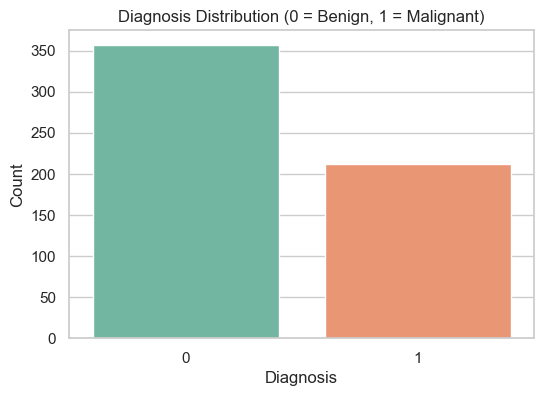

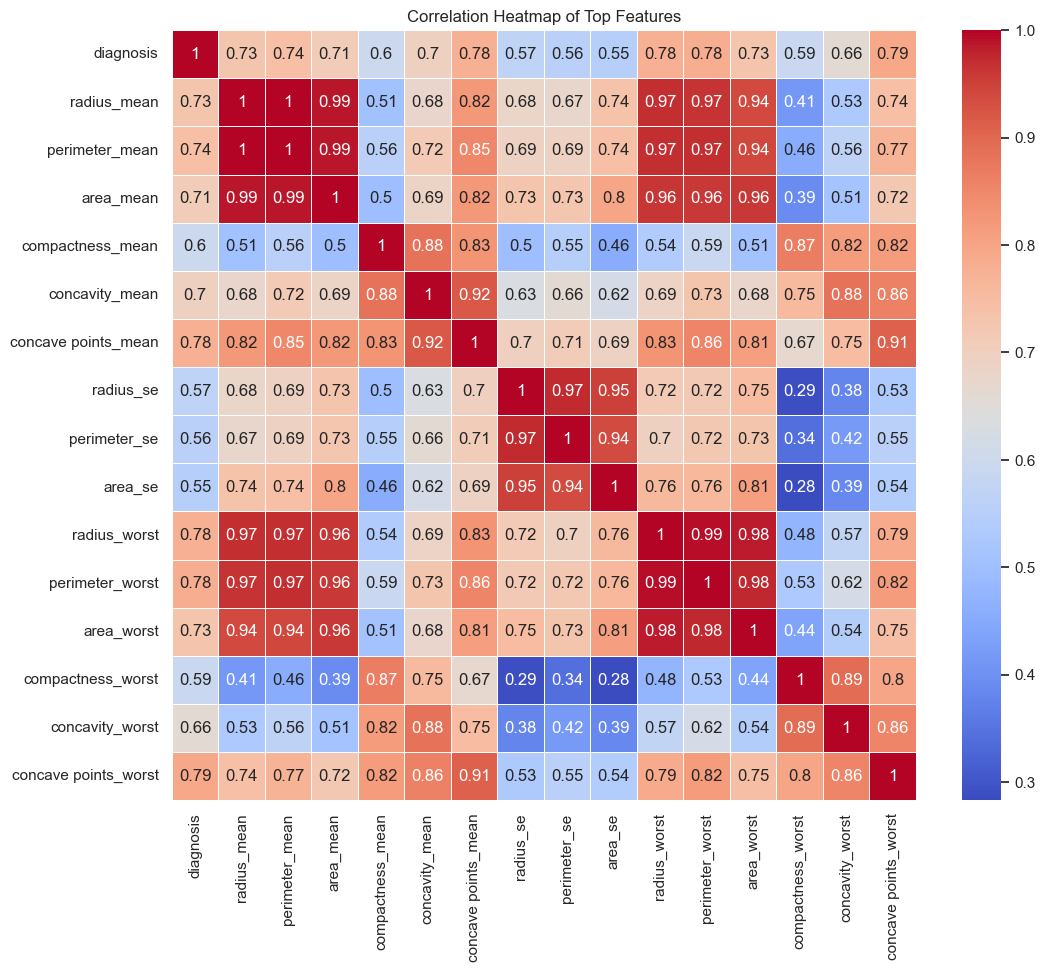

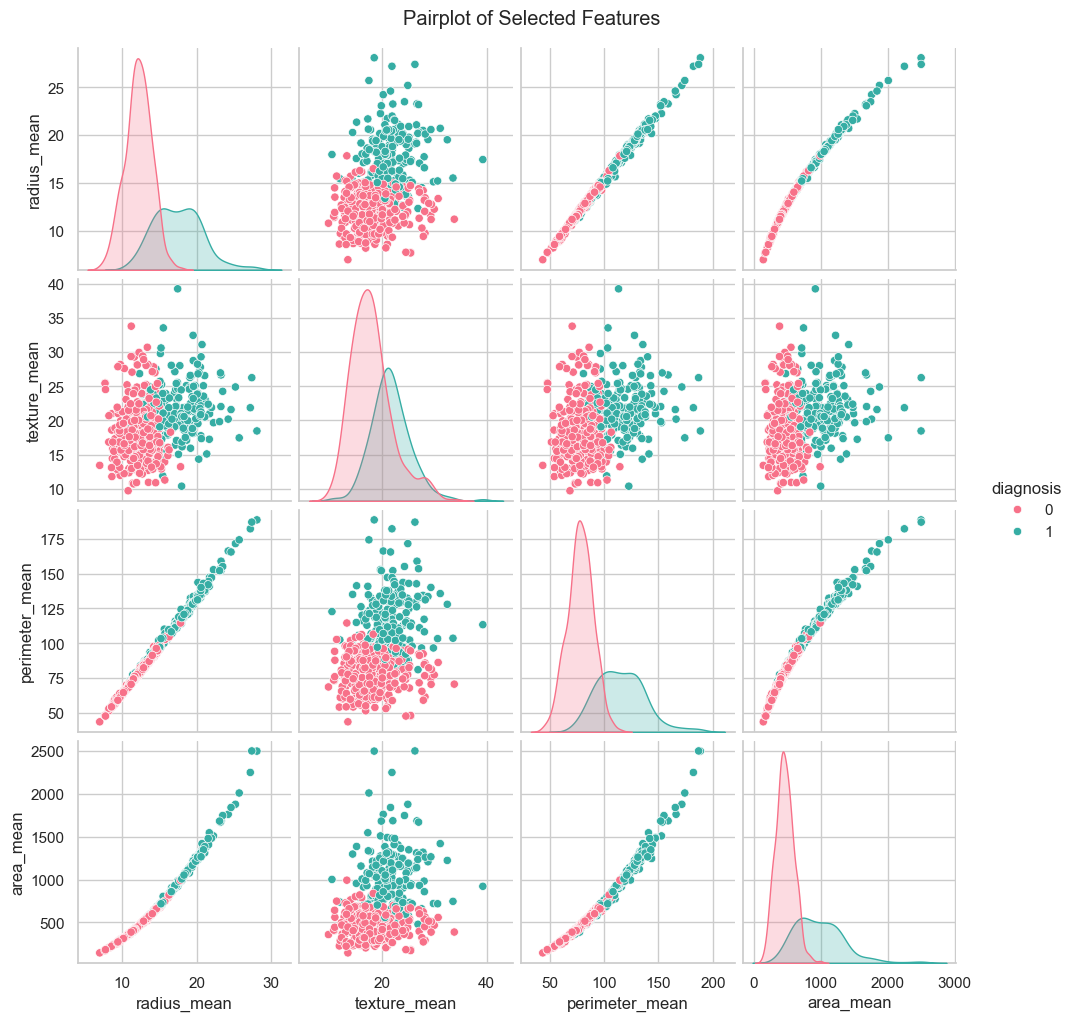

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Count plot for diagnosis (0 = Benign, 1 = Malignant)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='Set2', legend=False)
plt.title("Diagnosis Distribution (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# 2. Correlation heatmap for top features correlated with diagnosis
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
top_features = correlation_matrix.index[abs(correlation_matrix["diagnosis"]) > 0.5]
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Top Features")
plt.show()

# 3. Pairplot for selected features (useful to see separation between classes)
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


## ⚙️ Step 5: Preprocess the Data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Convert 'diagnosis' column to 0 (Benign) and 1 (Malignant) — skip if already done earlier
# df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 2. Split features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 3. Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 🤖 Step 6: Train a Machine Learning Model

In [20]:
# Use Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model training complete.")



Model training complete.


In [15]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [16]:
#SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = SVC()

svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)


In [23]:
#Feature Selection
from sklearn.preprocessing import StandardScaler

X_full = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=2000) 
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_rfe_features = X_full.columns[rfe.support_].tolist()
print("Selected features:", selected_rfe_features)

df_selected_rfe = df[selected_rfe_features].copy()
df_selected_rfe['diagnosis'] = y


Selected features: ['concave points_mean', 'radius_se', 'area_se', 'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


## 🧪 Step 7: Evaluate the Model

In [ ]:
#Evaluate the model using Logistic Regression
import numpy as np
import pandas as pd

feature_names = df.drop('diagnosis', axis=1).columns.tolist()

print("Enter the following 30 feature values:")
user_input = []

for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

user_df = pd.DataFrame([user_input], columns=feature_names)

user_scaled = scaler.transform(user_df)

prediction = model.predict(user_scaled)

if prediction[0] == 1:
    print("\nThe tumor is predicted to be **Malignant (Cancerous)**.")
else:
    print("\nThe tumor is predicted to be **Benign (Non-cancerous)**.")


In [14]:
#Evaluate the model using Random Forest
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Results:
Accuracy: 0.9649

Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [17]:
# Evaluate the model using SVM
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_pred))
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))


💠 Support Vector Machine Results:
Accuracy: 0.9825

Confusion Matrix:
[[71  0]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [24]:
#𝐒𝐭𝐞𝐩 𝟖 : 𝐇𝐲𝐩𝐞𝐫𝐩𝐚𝐫𝐚𝐦𝐞𝐭𝐞𝐫 𝐓𝐮𝐧𝐢𝐧𝐠
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

X = df_selected_rfe.drop('diagnosis', axis=1)
y = df_selected_rfe['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_acc = accuracy_score(y_test, rf_best.predict(X_test))


svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)
svm_best = svm_grid.best_estimator_
svm_acc = accuracy_score(y_test, svm_best.predict(X_test_scaled))


log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

log = LogisticRegression(max_iter=1000)
log_grid = GridSearchCV(log, log_params, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train_scaled, y_train)
log_best = log_grid.best_estimator_
log_acc = accuracy_score(y_test, log_best.predict(X_test_scaled))


print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Accuracy:", round(rf_acc, 4))

print("\nSVM Best Params:", svm_grid.best_params_)
print("SVM Accuracy:", round(svm_acc, 4))

print("\nLogistic Regression Best Params:", log_grid.best_params_)
print("Logistic Regression Accuracy:", round(log_acc, 4))


results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Test Accuracy': [rf_acc, svm_acc, log_acc]
})

print("\nModel Comparison:")
print(results)


🌲 Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
🎯 Random Forest Accuracy: 0.9561

💠 SVM Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
🎯 SVM Accuracy: 0.9737

🔷 Logistic Regression Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
🎯 Logistic Regression Accuracy: 0.9737

📊 Model Comparison:
                 Model  Test Accuracy
0        Random Forest       0.956140
1                  SVM       0.973684
2  Logistic Regression       0.973684


## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy